# 5. Missing Data

In [1]:
%run preamble.py
%matplotlib inline

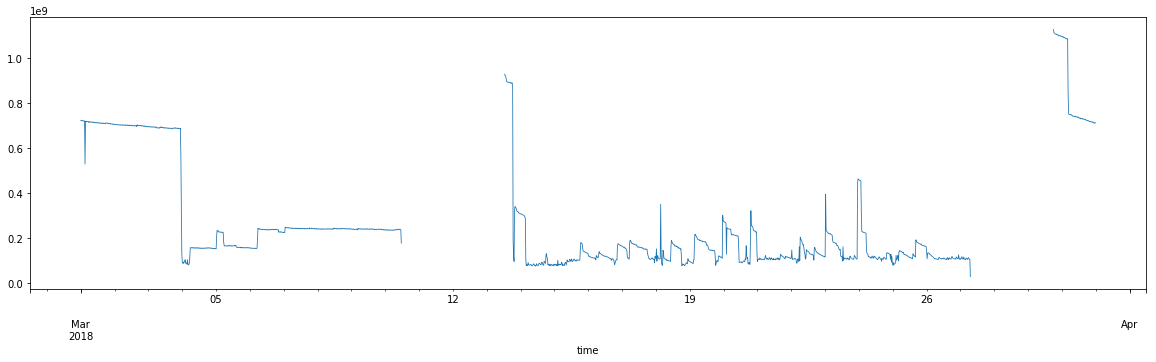

In [2]:
caql_plot('hartmann','''

metric:average('b6266779-c835-4341-a71b-a250e68d2347', 'vm`meminfo`MemFree')

''', datetime(2018,3,1), 60*20, 60*24*30/20)

Identify missing data with the `is_missing()` function.

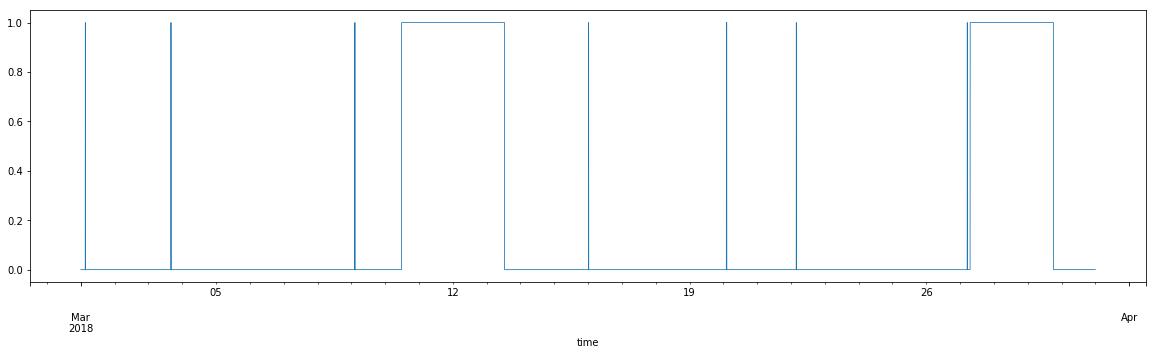

In [11]:
caql_plot('hartmann','''

metric:average('b6266779-c835-4341-a71b-a250e68d2347', 'vm`meminfo`MemFree')
| is_missing()

''', datetime(2018,3,1), 60, 60*24*30)

## Filling in missing data

- fill(value) -- fill missing data with a constant value
- fill:forward() -- fill missing data with the last known value

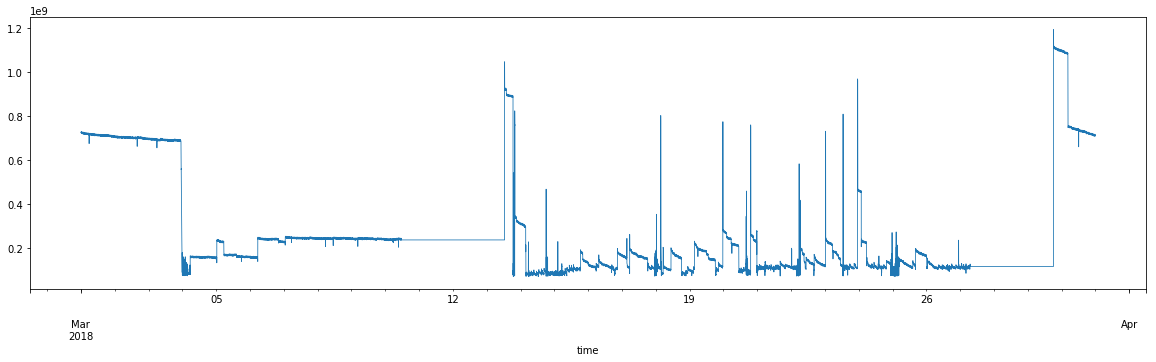

In [13]:
caql_plot('hartmann','''

metric:average('b6266779-c835-4341-a71b-a250e68d2347', 'vm`meminfo`MemFree')
// | fill(0)
| fill:forward()

''', datetime(2018,3,1), 60, 60*24*30)


## Filling data with Forecasts

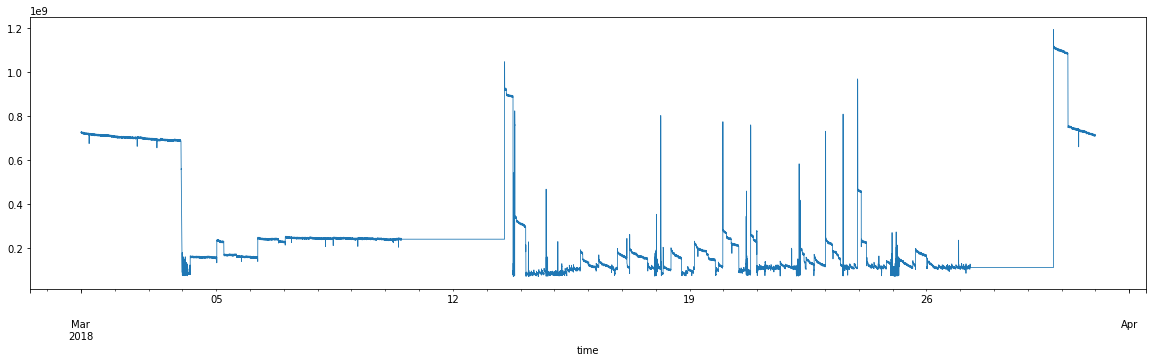

In [14]:
# Exponential Moving Average

caql_plot('hartmann','''

metric:average('b6266779-c835-4341-a71b-a250e68d2347', 'vm`meminfo`MemFree')
| forecasting:ewma(0.01, fill=2)

''', datetime(2018,3,1), 60, 60*24*30)


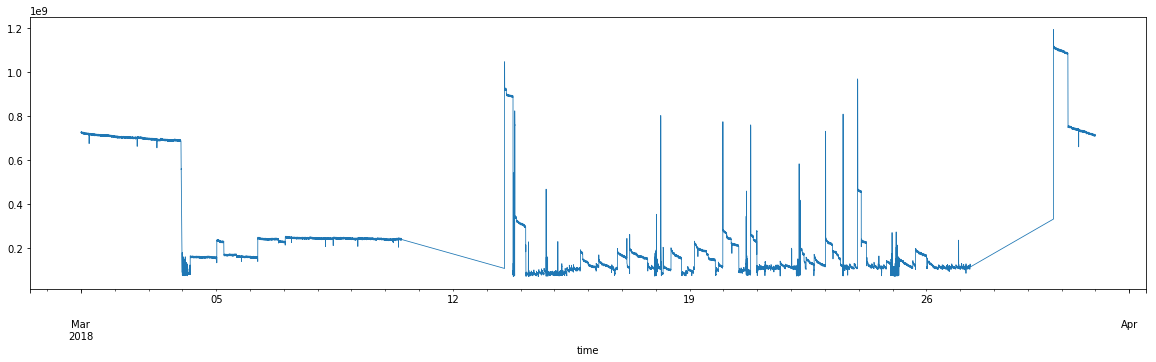

In [75]:
# Dewma picks up trends

caql_plot('hartmann','''

metric:average('b6266779-c835-4341-a71b-a250e68d2347', 'vm`meminfo`MemFree')
| forecasting:dewma(0.1, 0.02, fill=2)

''', datetime(2018,3,1), 60, 60*24*30)